In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def thin_len_coc(FN, dpt, focal_length, focus_dist, pixel_size=1.2e-5):
    sensor_dist = focus_dist * focal_length / (focus_dist - focal_length)
    D =  focal_length / FN
    CoC = D * sensor_dist * (1/focal_length - 1/sensor_dist - 1/dpt)
    sigma = CoC / 2 / pixel_size
    return np.abs(sigma), D, sensor_dist, sigma

In [3]:
sigmas = np.zeros((200, 200))
fd_list = np.linspace(0.1, 10, 200)
# fd_list = [0.1, 0.15, 0.3, 0.7, 1.5]
dpt_range = np.linspace(0.1, 10., 200)

In [4]:
for i, fd in enumerate(fd_list):
    for j, dpt in enumerate(dpt_range):
        sigma, _, _, _ = thin_len_coc(1.2, dpt, 50*1e-3, fd)
        sigmas[j][i] = sigma

In [5]:
X, Y = np.meshgrid(fd_list, dpt_range)

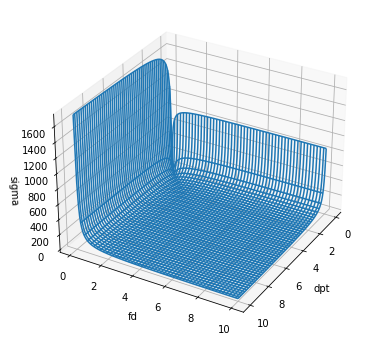

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(Y, X, sigmas)
ax.set_xlabel('dpt')
ax.set_ylabel('fd')
ax.set_zlabel('sigma')
ax.view_init(30, 30)
fig.show()

In [19]:
# fd_list = np.linspace(0.1, 1.5, 5)
# dpt_range = np.linspace(0.1, 10, 10)
fd_list = np.linspace(10/39.37, 155/39.37, 5)
# fd_list = [1, 1.5, 2.5, 4, 6]
dpt_range = np.linspace(0.1, 10, 200)
apt_list = [1.4, 2.0, 2.2, 3.2, 4.0, 5.6, 6.3, 8.0]


In [23]:
# df = dict(fd=[], dpt=[], sigma=[])
df = dict(apt=[], dpt=[], sigma=[])
for i, apt in enumerate(apt_list):
    for j, dpt in enumerate(dpt_range):
        r_sigma, D, _, sigma = thin_len_coc(apt, dpt, 50e-3, 5, pixel_size=5.6e-6)
        # df['fd'].append(fd)
        df['apt'].append(apt)
        df['dpt'].append(dpt)        
        # df['sigma'].append(sigma +1/2*D*0.029/dpt) 
        df['sigma'].append(r_sigma)               

In [24]:
df = pd.DataFrame.from_dict(df, dtype=np.float64)
# df

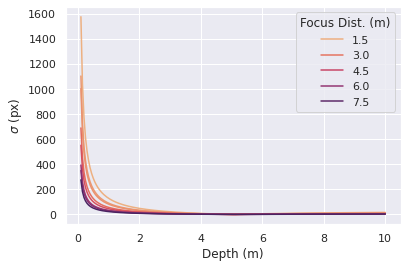

In [25]:
plt.figure()
sns.set_theme()
cmap = sns.color_palette("flare", as_cmap=True)
sns.lineplot(data=df, x='dpt', y='sigma', hue='apt', palette=cmap)
plt.xlabel('Depth (m)')
plt.ylabel('$\sigma$ (px)')
plt.legend(title = "Focus Dist. (m)")
# plt.savefig('../../ss-dfd/jupyter_nb/paper_img/response_curve.png', dpi=200)

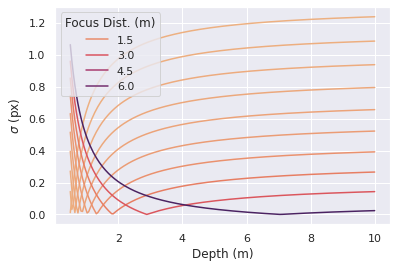

In [30]:
plt.figure()
sns.set_theme()
cmap = sns.color_palette("flare", as_cmap=True)
sns.lineplot(data=df, x='dpt', y='sigma', hue='fd', palette=cmap)
plt.xlabel('Depth (m)')
plt.ylabel('$\sigma$ (px)')
plt.legend(title = "Focus Dist. (m)")

In [ ]:
def reform_thin_len_coc(FN, dpt, focal_length, focus_dist):
    D =  focal_length / FN
    sigma = -1/2 * D * focal_length / dpt + 1/2* D*focal_length**2 *(1/focal_length-1/dpt)/(focus_dist-focal_length)
    return np.abs(sigma), D, sigma